In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

In [12]:
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Load processed data
path = '../../data/processed/merged_mbta_weather.csv'
df = pd.read_csv(path)

# Convert service_date to datetime for time-based analysis
df['service_date'] = pd.to_datetime(df['service_date'])

In [13]:
# Feature Engineering
# Add day of week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['service_date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['month'] = df['service_date'].dt.month
df['year'] = df['service_date'].dt.year

In [14]:
# Define MBTA line colors and their stations (same as in sortedByLine.ipynb)
line_colors = {
    'Red': ['Alewife', 'Davis', 'Porter', 'Harvard', 'Central', 'Kendall', 'Charles/MGH', 'Park Street', 
            'Downtown Crossing', 'South Station', 'Broadway', 'Andrew', 'JFK/UMass', 'Savin Hill',
            'Fields Corner', 'Shawmut', 'Ashmont', 'North Quincy', 'Wollaston', 'Quincy Center', 
            'Quincy Adams', 'Braintree'],
    'Green': ['Lechmere', 'Science Park', 'North Station', 'Haymarket', 'Government Center', 
              'Park Street', 'Boylston', 'Arlington', 'Copley', 'Hynes', 'Kenmore', 'Prudential',
              'Symphony', 'Northeastern', 'Museum of Fine Arts', 'Longwood Medical Area', 'Brigham Circle',
              'Fenwood Road', 'Mission Park', 'Riverway', 'Back of the Hill', 'Heath Street', 'Cleveland Circle',
              'Beaconsfield', 'Reservoir', 'Chestnut Hill', 'Newton Centre', 'Boston College'],
    'Orange': ['Oak Grove', 'Malden Center', 'Wellington', 'Assembly', 'Sullivan Square', 'Community College',
              'North Station', 'Haymarket', 'State', 'Downtown Crossing', 'Chinatown', 'Tufts Medical Center',
              'Back Bay', 'Massachusetts Avenue', 'Ruggles', 'Roxbury Crossing', 'Jackson Square',
              'Stony Brook', 'Green Street', 'Forest Hills'],
    'Blue': ['Wonderland', 'Revere Beach', 'Beachmont', 'Suffolk Downs', 'Orient Heights', 'Wood Island',
            'Airport', 'Maverick', 'Aquarium', 'State', 'Government Center', 'Bowdoin'],
    'Silver': ['South Station', 'Courthouse', 'World Trade Center']
}

# Add line color based on station names
def assign_line_colors(df, line_colors):
    """Assign MBTA line colors to stations in the dataframe"""
    df['line_color'] = 'Other'  # Default value
    for color, stations in line_colors.items():
        for station in stations:
            mask = df['station_name'].str.contains(station, case=False, na=False)
            df.loc[mask, 'line_color'] = color
    return df

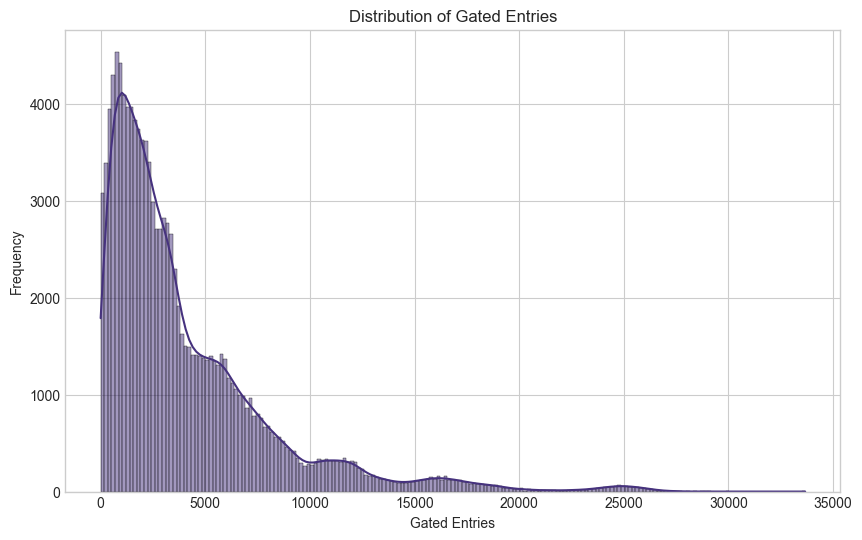

In [15]:
# Assign line colors
df = assign_line_colors(df, line_colors)

# Visualize the distribution of entries
plt.figure(figsize=(10, 6))
sns.histplot(df['gated_entries'], kde=True)
plt.title('Distribution of Gated Entries')
plt.xlabel('Gated Entries')
plt.ylabel('Frequency')
plt.show()

# Explore correlations between weather and ridership


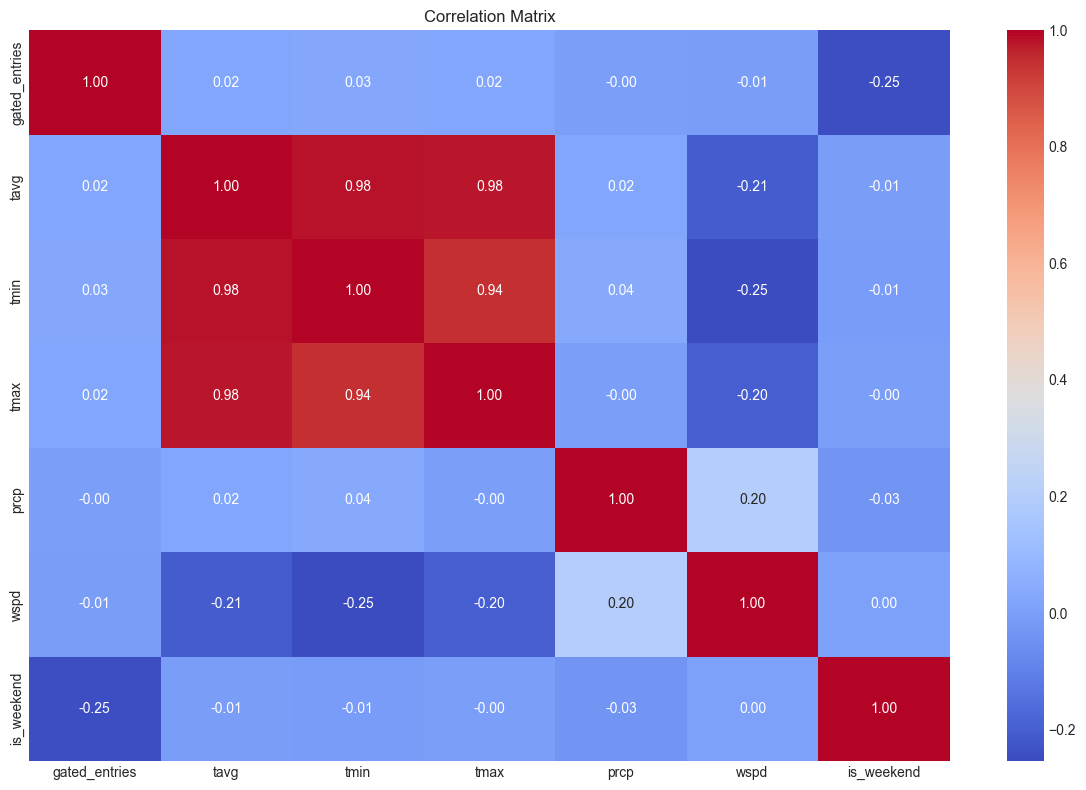

In [16]:
plt.figure(figsize=(12, 8))
correlation_vars = ['gated_entries', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'is_weekend']
correlation_matrix = df[correlation_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plots for each weather variable


/var/folders/td/336js9nx5gs4l3sd3xhz6wxw0000gn/T/ipykernel_85764/1240793095.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


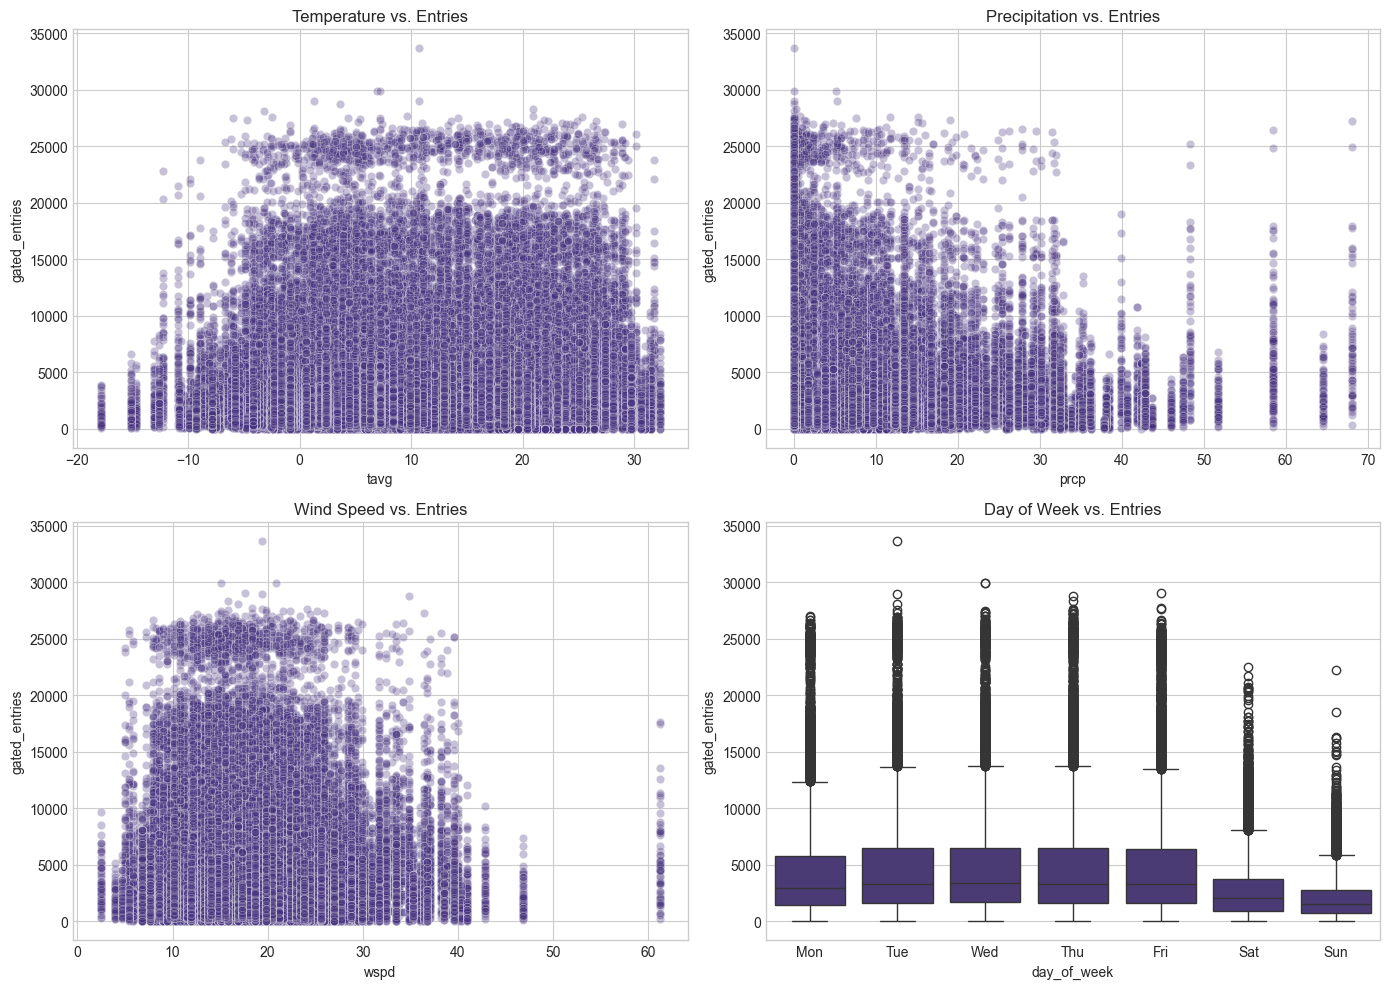

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(x='tavg', y='gated_entries', data=df, alpha=0.3, ax=axes[0, 0])
axes[0, 0].set_title('Temperature vs. Entries')

sns.scatterplot(x='prcp', y='gated_entries', data=df, alpha=0.3, ax=axes[0, 1])
axes[0, 1].set_title('Precipitation vs. Entries')

sns.scatterplot(x='wspd', y='gated_entries', data=df, alpha=0.3, ax=axes[1, 0])
axes[1, 0].set_title('Wind Speed vs. Entries')

sns.boxplot(x='day_of_week', y='gated_entries', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Day of Week vs. Entries')
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

# Linear Regression Modeling



--- Basic Linear Regression Model ---
Training set size: 91121 samples
Testing set size: 27771 samples
Mean Squared Error (MSE): 7575075.58
Root Mean Squared Error (RMSE): 2752.29
Mean Absolute Error (MAE): 2380.66
R² Score: -0.2221

Model Coefficients:
  Feature  Coefficient
0    tavg     1.973302
1    prcp    -6.309341
2    wspd     3.616571
Intercept: 4293.10


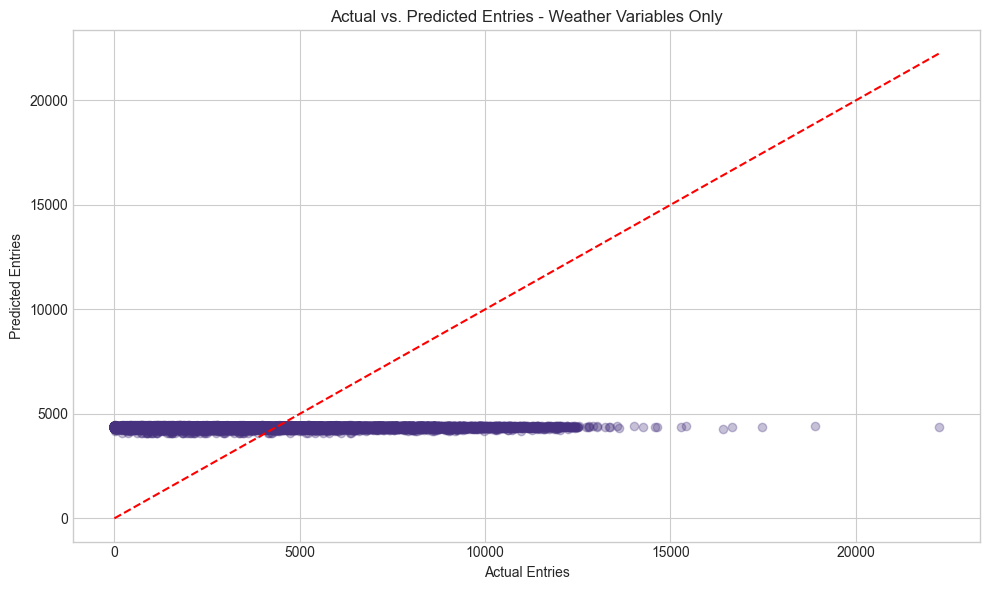


--- Enhanced Linear Regression Model ---
Mean Squared Error (MSE): 6332033.78
Root Mean Squared Error (RMSE): 2516.35
Mean Absolute Error (MAE): 2143.60
R² Score: -0.0921

Top 10 Influential Features:
              Feature   Coefficient
3          is_weekend -7.575913e+14
8       day_of_week_5  7.575913e+14
9       day_of_week_6  7.575913e+14
23   line_color_Other -2.014237e+03
25  line_color_Silver  1.316250e+03
22  line_color_Orange  1.290674e+03
24     line_color_Red  1.077700e+03
21   line_color_Green  8.369511e+02
16            month_8 -7.643349e+02
15            month_7 -7.387118e+02


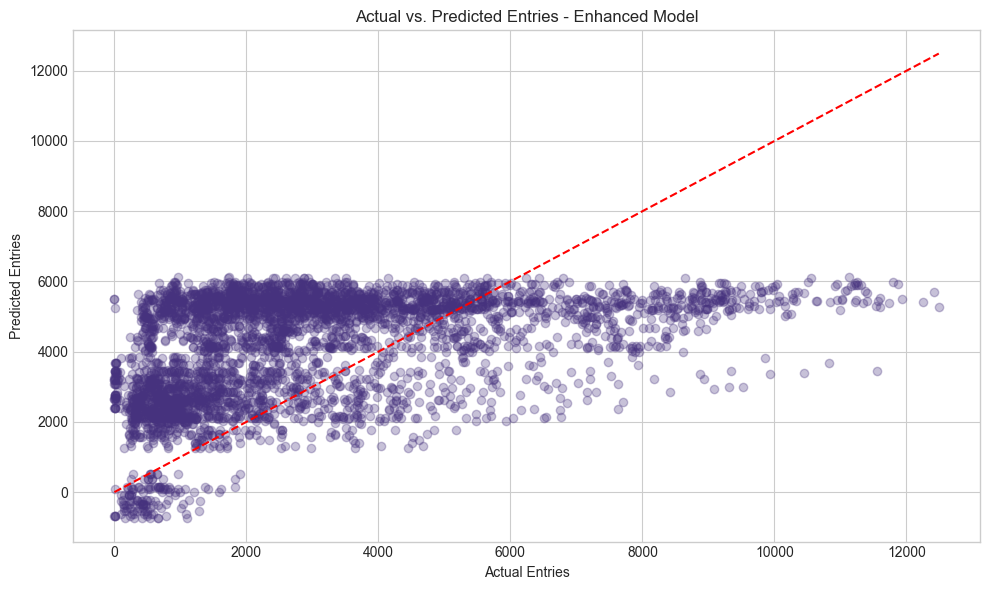


--- Line-specific Analysis ---

Analyzing Blue Line
RMSE: 2104.40
R² Score: 0.0037
Model Coefficients:
tavg: 19.5086
prcp: -4.9814
wspd: -3.8252

Analyzing Red Line
RMSE: 2612.27
R² Score: -0.2059
Model Coefficients:
tavg: 3.8221
prcp: -1.0225
wspd: 0.4933

Analyzing Green Line
RMSE: 2347.91
R² Score: -0.0787
Model Coefficients:
tavg: 12.6012
prcp: -4.1456
wspd: -2.4659

Analyzing Orange Line
RMSE: 2753.50
R² Score: -0.2792
Model Coefficients:
tavg: -4.9705
prcp: -0.4276
wspd: 0.8337

Analyzing Silver Line
RMSE: 3930.45
R² Score: -0.0721
Model Coefficients:
tavg: 5.7950
prcp: 6.6807
wspd: 3.2926


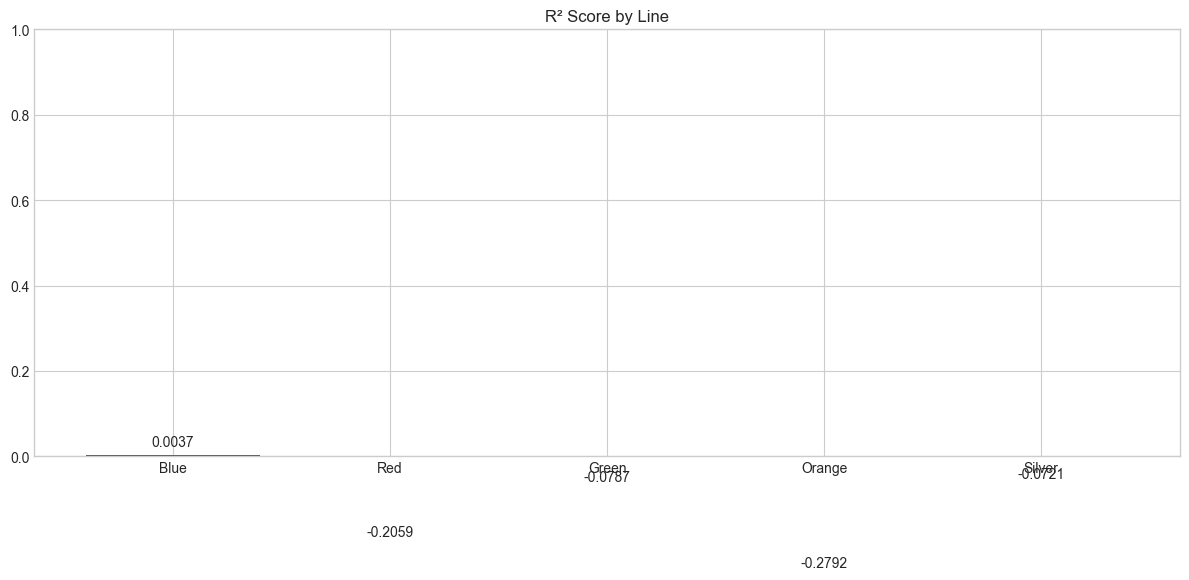

In [ ]:
# 1. Basic model using only weather variables
print("\n--- Basic Linear Regression Model ---")

# Select features and target
weather_features = ['tavg', 'prcp', 'wspd']
X = df[weather_features]
y = df['gated_entries']

# Train-test split based on time
# Train on data before 2022, test on 2022-2023 data
train_mask = df['service_date'] < '2022-01-01'
test_mask = df['service_date'] >= '2022-01-01'

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Display coefficients
coef_df = pd.DataFrame({
    'Feature': weather_features,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coef_df)
print(f"Intercept: {model.intercept_:.2f}")

# Visualize actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Entries')
plt.ylabel('Predicted Entries')
plt.title('Actual vs. Predicted Entries - Weather Variables Only')
plt.tight_layout()
plt.show()

# 2. Enhanced model with weather + time features
print("\n--- Enhanced Linear Regression Model ---")

# Add additional features (one-hot encoding day of week and month)
df_encoded = pd.get_dummies(df, columns=['day_of_week', 'month', 'line_color'], drop_first=True)

# Select features and target
enhanced_features = [col for col in df_encoded.columns if col.startswith(('tavg', 'prcp', 'wspd', 'day_of_week_', 'month_', 'line_color_', 'is_weekend'))]
X_enhanced = df_encoded[enhanced_features]
y = df_encoded['gated_entries']

# Train-test split based on time
train_mask = df_encoded['service_date'] < '2023-01-01'
test_mask = df_encoded['service_date'] >= '2023-01-01'

X_train_enhanced = X_enhanced[train_mask]
X_test_enhanced = X_enhanced[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]

# Train the enhanced model
enhanced_model = LinearRegression()
enhanced_model.fit(X_train_enhanced, y_train)

# Make predictions
y_pred_enhanced = enhanced_model.predict(X_test_enhanced)

# Evaluate the model
mse_enhanced = mean_squared_error(y_test, y_pred_enhanced)
rmse_enhanced = np.sqrt(mse_enhanced)
mae_enhanced = mean_absolute_error(y_test, y_pred_enhanced)
r2_enhanced = r2_score(y_test, y_pred_enhanced)

print(f"Mean Squared Error (MSE): {mse_enhanced:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_enhanced:.2f}")
print(f"Mean Absolute Error (MAE): {mae_enhanced:.2f}")
print(f"R² Score: {r2_enhanced:.4f}")

# Top influential features
coef_df_enhanced = pd.DataFrame({
    'Feature': enhanced_features,
    'Coefficient': enhanced_model.coef_
})
coef_df_enhanced = coef_df_enhanced.sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 10 Influential Features:")
print(coef_df_enhanced.head(10))

# Visualize actual vs. predicted for enhanced model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_enhanced, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Entries')
plt.ylabel('Predicted Entries')
plt.title('Actual vs. Predicted Entries - Enhanced Model')
plt.tight_layout()
plt.show()

# Compare model performance
models = ['Weather Variables Only', 'Enhanced Model']
r2_scores = [r2, r2_enhanced]
rmse_scores = [rmse, rmse_enhanced]



# 3. Per-line analysis
print("\n--- Line-specific Analysis ---")

lines = df['line_color'].unique()
r2_by_line = []
rmse_by_line = []

for line in lines:
    if line == 'Other':
        continue
        
    print(f"\nAnalyzing {line} Line")
    
    # Filter data for this line
    line_df = df[df['line_color'] == line]
    
    # Select features and target
    X_line = line_df[weather_features]
    y_line = line_df['gated_entries']
    
    # Train-test split based on time
    train_mask = line_df['service_date'] < '2023-01-01'
    test_mask = line_df['service_date'] >= '2023-01-01'
    
    X_train_line = X_line[train_mask]
    X_test_line = X_line[test_mask]
    y_train_line = y_line[train_mask]
    y_test_line = y_line[test_mask]
    
    # Train the model
    line_model = LinearRegression()
    line_model.fit(X_train_line, y_train_line)
    
    # Make predictions
    y_pred_line = line_model.predict(X_test_line)
    
    # Evaluate the model
    mse_line = mean_squared_error(y_test_line, y_pred_line)
    rmse_line = np.sqrt(mse_line)
    r2_line = r2_score(y_test_line, y_pred_line)
    
    print(f"RMSE: {rmse_line:.2f}")
    print(f"R² Score: {r2_line:.4f}")
    
    # Store metrics for comparison
    r2_by_line.append(r2_line)
    rmse_by_line.append(rmse_line)
    
    # Display coefficients
    print("Model Coefficients:")
    for feature, coef in zip(weather_features, line_model.coef_):
        print(f"{feature}: {coef:.4f}")